In [6]:
# https://aws.amazon.com/blogs/machine-learning/creating-neural-time-series-models-with-gluon-time-series/


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from tqdm.autonotebook import tqdm
from pathlib import Path

!pip install gluonts

/var/folders/49/mxg1tghn043czqmz572bynpc0000gp/T/ipykernel_4015/3940108732.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


     |████████████████████████████████| 2.1 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 42.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 9.5 MB/s  eta 0:00:01
     |████████████████████████████████| 5.4 MB 6.4 MB/s eta 0:00:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730984 sha256=9145a8f0e207f641760a882a249631e93a59716ebf5fee6874594fb6de11ad87
  Stored in directory: /Users/jiehawes/Library/Caches/pip/wheels/33/3d/82/4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
Successfully built pymeeus


In [10]:
!pip3 install mxnet

     |████████████████████████████████| 34.9 MB 17.1 MB/s eta 0:00:01


In [14]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

estimator = DeepAREstimator(freq="5min", 
                            prediction_length=36, 
                            trainer=Trainer(epochs=10))

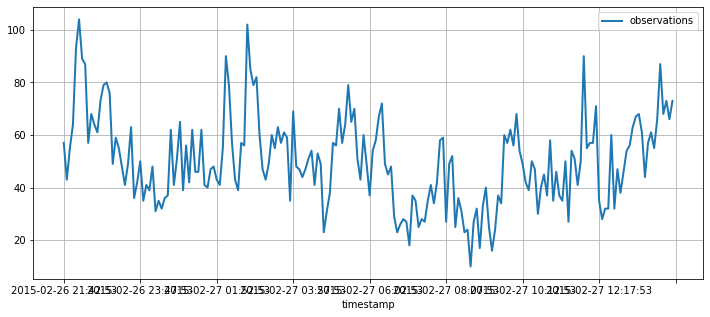

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)

df[:200].plot(figsize=(12, 5), linewidth=2)
plt.grid()
plt.legend(["observations"])
plt.show()

In [16]:
from gluonts.dataset.common import ListDataset

training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

In [17]:
predictor = estimator.train(training_data=training_data)

/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/gluonts/dataset/common.py:323: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/gluonts/dataset/common.py:326: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/gluonts/dataset/common.py:328: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/gluonts/dataset/common.py:327: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestam

In [18]:
test_data = ListDataset(
    [
        {"start": df.index[0], "target": df.value[:"2015-04-10 03:00:00"]},
        {"start": df.index[0], "target": df.value[:"2015-04-15 18:00:00"]},
        {"start": df.index[0], "target": df.value[:"2015-04-20 12:00:00"]}
    ],
    freq = "5min"
)

/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_point, self._max_time_point, freq=start.freq


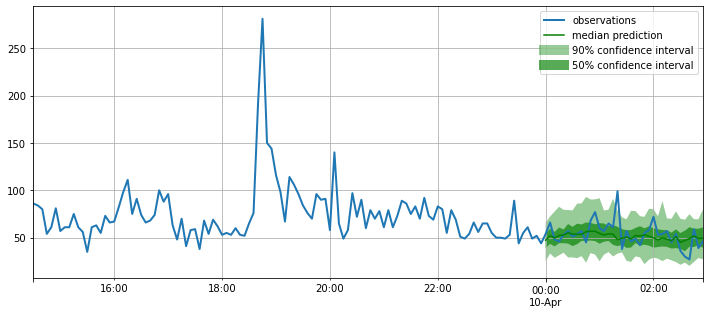

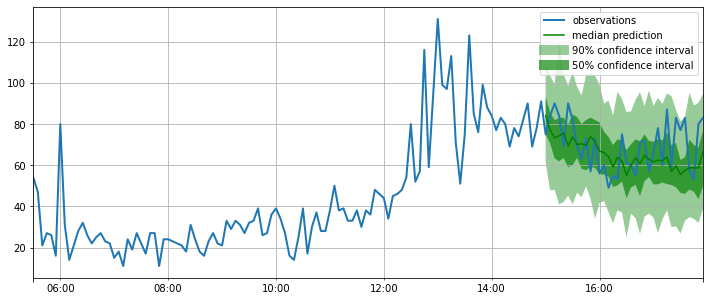

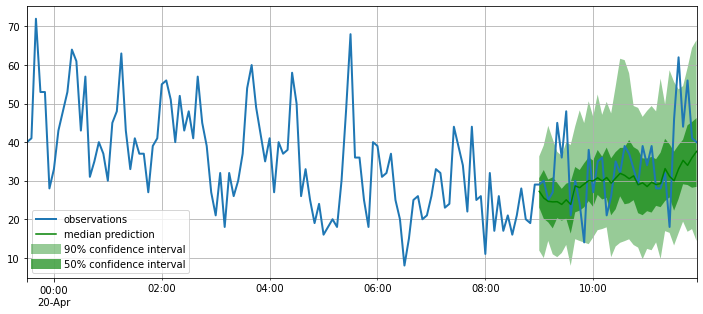

In [20]:
from itertools import islice
from gluonts.evaluation.backtest import make_evaluation_predictions

def plot_forecasts(tss, forecasts, past_length, num_plots):
    for target, forecast in islice(zip(tss, forecasts), num_plots):
        ax = target[-past_length:].plot(figsize=(12, 5), linewidth=2)
        forecast.plot(color='g')
        plt.grid(which='both')
        plt.legend(["observations", "median prediction", "90% confidence interval", "50% confidence interval"])
        plt.show()

forecast_it, ts_it = make_evaluation_predictions(test_data, predictor=predictor)
forecasts = list(forecast_it)
tss = list(ts_it)
plot_forecasts(tss, forecasts, past_length=150, num_plots=3)